In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch
from astropy.io import fits

import sunpy.coordinates  # NOQA
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

import torch

#for visualisation
import ipympl

In [4]:
def load_data():
    data=pd.read_csv("./data/Jet_clusters_3.0_2.0_paperID.csv", sep=",")
    data.columns=data.columns.str.strip()
    data=data.drop(columns="velocity")

    return data

def get_image(data):
    data=data.reset_index()
    dates=data["date"]

    for i,date in enumerate(dates):
        print(date)
        start_time = Time(date, scale='utc', format='isot') #“CCYY-MM-DDThh:mm:ss[.sss. . . ]”, Coordinated Universal Time (UTC), 

        bottom_x=data["basepoint_X"][i]  # I am not sure this is right
        bottom_y=data["basepoint_Y"][i]   # same

        duration=data["duration"][i]
        
        bottom_left = SkyCoord((bottom_x-150)*u.arcsec, (bottom_y-150)*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
        top_right = SkyCoord((bottom_x+150)*u.arcsec, (bottom_y+150)*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")

        jsoc_email = "adrien.joliat@epfl.ch"

        cutout = a.jsoc.Cutout(bottom_left=bottom_left, top_right=top_right, tracking=True)
        print(bottom_left)
        query = Fido.search(
            a.Time(start_time , start_time + duration*u.min), #duration is in min
            a.Wavelength(304*u.angstrom),
            a.Sample(2*u.min), #one image /12 s --> 5images per min
            a.jsoc.Series.aia_lev1_euv_12s,
            a.jsoc.Notify(jsoc_email),
            a.jsoc.Segment.image,
            cutout,
        )
        files = Fido.fetch(query)
        files.sort()
    return files

def array_file(file): #for the moment only designed for one file
    with fits.open(file[0]) as f:
        array=f[1].data
        image_array=np.array(array)
    return image_array

def plot(files):
    sequence = sunpy.map.Map(files, sequence=True)

    fig = plt.figure()
    ax = fig.add_subplot(projection=sequence.maps[0])
    ani = sequence.plot(axes=ax, norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))
    return ani

2011-01-20T09:15:44.000000
<SkyCoord (Helioprojective: obstime=2011-01-20T09:15:44.000, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate for 'earth'>): (Tx, Ty) in arcsec
    (-376.577125, -1106.964375)>
Export request pending. [id=JSOC_20231114_2366, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231114_2366, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231114_2366, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231114_2366, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231114_2366, status=1]
Waiting for 5 seconds...
22 URLs found for download. Full request totalling 4MB


Files Downloaded:   0%|          | 0/22 [00:00<?, ?file/s]

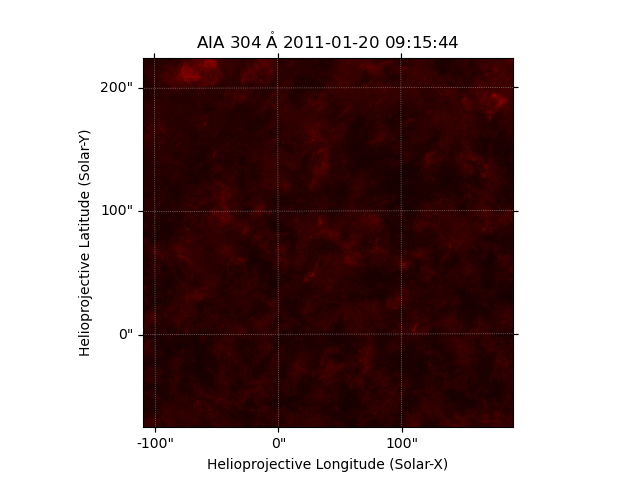

In [5]:
data=load_data()
files=get_image(data[data.index==0]) #first line of the data
image_array=array_file(files)

%matplotlib ipympl
sequence = sunpy.map.Map(files, sequence=True)

fig = plt.figure()
ax = fig.add_subplot(projection=sequence.maps[0])
ani = sequence.plot(axes=ax, norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))
    

Results from 1 Provider:

1 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2011-01-20T08:15:38Z  SDO/AIA    AIA_4      304    2105


Export request pending. [id=JSOC_20231111_1129, status=2]
Waiting for 0 seconds...
1 URLs found for download. Full request totalling 1MB


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

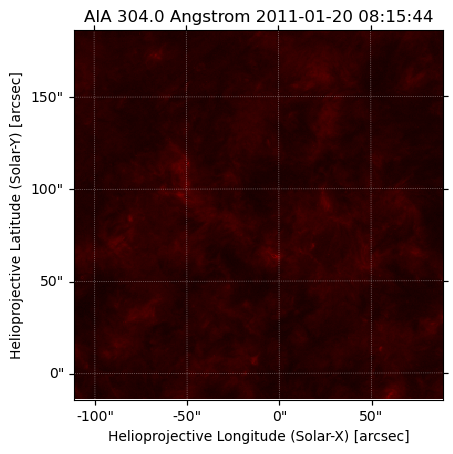

In [21]:
start_time = Time('2011-01-20T09:15:44', scale='utc', format='isot')

bottom_left = SkyCoord(-100*u.arcsec, -100*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
top_right = SkyCoord(500*u.arcsec, 500*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")

jsoc_email = "adrien.joliat@epfl.ch"

cutout = a.jsoc.Cutout(bottom_left=bottom_left, top_right=top_right, tracking=True)

query = Fido.search(
    a.Time(start_time - 1*u.h, start_time + 1*u.h),
    a.Wavelength(304*u.angstrom),
    a.Sample(3*u.h),
    a.jsoc.Series.aia_lev1_euv_12s,
    a.jsoc.Notify(jsoc_email),
    a.jsoc.Segment.image,
    cutout,
)
print(query)
files = Fido.fetch(query)
files.sort()

sequence = sunpy.map.Map(files, sequence=True)

fig = plt.figure()
ax = fig.add_subplot(projection=sequence.maps[0])
sequence.plot(axes=ax, norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))

In [3]:
import pandas as pd
data=pd.read_csv("./data/Jet_clusters_3.0_2.0_paperID.csv", sep=",")
data.columns=data.columns.str.strip()
data=data.drop(columns="velocity")
data.head(2)

,#sjh_ID,date,SOL_event,duration,basepoint_X,std_X,basepoint_Y,std_Y,basepoint_X_longitude,basepoint_Y_latitude,max_height,upper_H,lower_H,avg_width,std_width,sigma,flag
0,sjh_2011-01-20T09_1,2011-01-20T09:15:44.000000,SOL2011-01-20T09:00:09L289C165,43.6,-226.577125,7.456468,-956.964375,9.576814,-109.0,-75.0,173.811389,46.785032,-36.862662,52.282512,14.552284,0.417661,1
1,sjh_2011-01-20T23_1,2011-01-20T23:49:20.000000,SOL2011-01-20T22:00:09L353C074,10.8,-143.625000,1.125000,386.404000,2.856000,-8.0,18.0,97.731917,16.548028,-14.151831,83.204500,10.121327,0.337046,10


In [4]:
import numpy as np
def get_image(data):
    dates=data["date"]
    
    for i,date in enumerate(dates):

        start_time = Time(date, scale='utc', format='isot')

        bottom_x=data["basepoint_X_longitude"][i]
        bottom_y=data["basepoint_Y_latitude"][i]

        duration=data["duration"][i]

        bottom_left = SkyCoord(bottom_x*u.arcsec, bottom_y*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
        top_right = SkyCoord((bottom_x+300)*u.arcsec, (bottom_y+300)*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")

        jsoc_email = "adrien.joliat@epfl.ch"

        cutout = a.jsoc.Cutout(bottom_left=bottom_left, top_right=top_right, tracking=True)

        query = Fido.search(
            a.Time(start_time , start_time + duration*u.min),
            a.Wavelength(304*u.angstrom),
            a.Sample(5*u.h),
            a.jsoc.Series.aia_lev1_euv_12s,
            a.jsoc.Notify(jsoc_email),
            a.jsoc.Segment.image,
            cutout,
        )
        files = Fido.fetch(query)
        files.sort()
    return files


file=get_image(data[data.index==0])

Export request pending. [id=JSOC_20231111_1179, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231111_1179, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_1179, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_1179, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231111_1179, status=1]
Waiting for 5 seconds...
1 URLs found for download. Full request totalling 1MB


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

[[ 70  71  84 ...  93 103 106]
 [ 64  75  88 ...  90 115 102]
 [ 62  90  98 ...  86  82  88]
 ...
 [ 66  72  89 ... 328 475 445]
 [ 62  87  73 ... 420 873 746]
 [ 73  71  69 ... 483 883 866]]


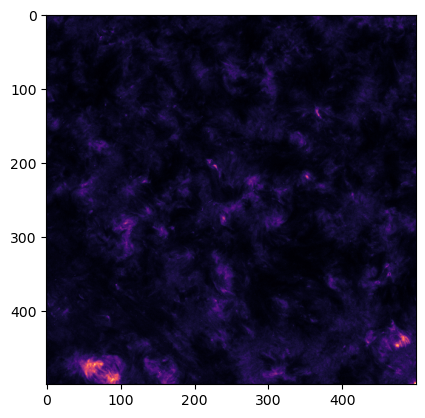

In [25]:
from astropy.io import fits
with fits.open(file[0]) as f:
    data=f[1].data
    image_array=np.array(data)
    print(image_array)
plt.imshow(image_array, cmap="magma")